### week 5

# Generalisation

- over-fitting problem
- hold out validation
- leave one out and cross validation
- bias variance tradeoff

In [1]:
import pods
import notebook as nb
import mlai
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
basis = mlai.polynomial
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']
data_limits = [1892, 2020]
num_data = x.shape[0]
max_basis = 7

### Review and Preview

- Last week we studied *basis functions*
- We saw how the likelihood of a nonlinear regression model could be maximised
- This week we look at an over-fitting problem in machine learning and explore how to validate the model

### Recall: Olympic Marathon Data

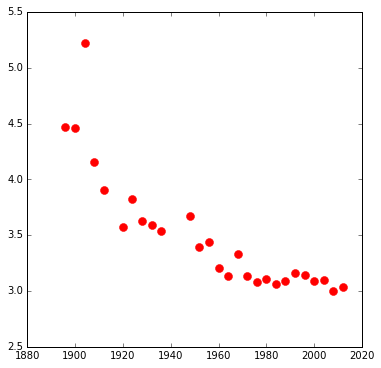

In [3]:
f, ax = plt.subplots(figsize=(6,6))
ax.plot(data['X'], data['Y'], 'r.',markersize=16)

### Alan Turing

![Alan Turing running in 1946](http://www.turing.org.uk/turing/pi2/run.jpg)

**Alan Turing** was a formidable Marathon runner.
In 1946 he ran a time 2 hours 46 minutes, which was only 11 minutes slower than the winner of the 1948 games.

Would he have won a hypothetical games held in 1946?
What is the probability he won an Olympics if one had been held in 1946?

Source: [Alan Turing Internet Scrapbook](http://www.turing.org.uk/scrapbook/run.html)

Wikipedia: [Alan Turing](https://en.wikipedia.org/wiki/Alan_Turing)

### Polynomial Fits to Olymics Data

Last week we saw an error function with basis functions (eg, polynomial basis):
$$
  E(\mathbf{w},\sigma^2) = \frac{n}{2}\log\sigma^2 + \sum_{i=1}^n \frac{(y_i - \mathbf{w}^\top \boldsymbol{\phi}_i)^2}{2\sigma^2}
$$
then used an algorithm to find values for $\mathbf{w}$ and $\sigma^2$ that minimised $E(\mathbf{w},\sigma^2)$ .

Wikipedia: [Polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression)

(next graph) finding polynomial fits when the number of basis are between 1 and 7

In [4]:
nb.display_plots('olympic_LM_polynomial_num_basis{num_basis:0>3}.svg', directory='./diagrams', num_basis=(1, max_basis))

We see that by using seven basis the polynomial fit better to the data than when using the less number of basis.

Could we say - the more the basis the better the model?

### Overfitting

By increasing the number of basis functions we obtain a better 'fit' to the data.
How will the model perform on previously unseen data?

Wikipedia: [Overfitting](https://en.wikipedia.org/wiki/Overfitting)

(next graph) suppose we know the winning time (red circles) up to year 1984, are we able to predict those (green) for the rest of years?

In [5]:
nb.display_plots('olympic_val_LM_polynomial_num_basis{num_basis:0>3}.svg', directory='./diagrams', num_basis=(1, max_basis))

### Extrapolation

We are extrapolating beyond where the model has learnt.
This is known as **extrapolation**.

Here extrapolation is predicting into the future here but it could be:
- predicting back to the unseen past (pre 1892)
- spatial prediction (eg, Cholera rates outside Manchester given rates inside Manchester)

### Interpolation

Predicting the wining time for 1946 Olympics is **interpolation**.
There wasn't an Olympics between 1936 and 1948.

If we want a model for interpolation how can we test it?
One trick is to sample the validation set from throughout the dataset (eg, **hold out validation**)

Wikipedia: [Regression validation](https://en.wikipedia.org/wiki/Regression_validation)

### Hold Out Validation

We assign data points to the **training set** and the **validation set**.

Choice of the validation set should reflect how you will use the model in practice:
- for **extrapolation** into the future we try validating with data from the future
- for **interpolation** we choose the validation set from data

For different validation sets we could get different results.

(next graph) hold out validation: validation set is in green

In [6]:
nb.display_plots('olympic_val_inter_LM_polynomial_num_basis{num_basis:0>3}.svg', directory='./diagrams', num_basis=(1, max_basis))

### Leave One Out Error

1. remove one point from the dataset
2. train a model from the remaining data
3. compute the error on the removed point (which wasn't in the training data)
4. repeat this for each point in the dataset in turn
5. average the resulting error

Wikipedia: [Leave-one-out error](https://en.wikipedia.org/wiki/Leave-one-out_error)

(next graph) leave one out error: validation data is in green

In [7]:
nb.display_plots('olympic_loo{part:0>3}_LM_polynomial_num_basis{num_basis:0>3}.svg', directory='./diagrams', num_basis=(1, max_basis), part=(0,x.shape[0]-1))

### Bias Variance Decomposition

The expected error for a trained model $f^*$ with unseen data $(\mathbf{x},y)$ is decomposed as
$$
  \mathbb{E}\left[ (y - f^*(\mathbf{x}))^2 \right] = \left\{ \text{bias}\left[ f^*(\mathbf{x}) \right] \right\}^2 + \text{variance}\left[ f^*(\mathbf{x}) \right] + \sigma^2
$$
where
\begin{align*}
  \text{bias}\left[ f^*(\mathbf{x}) \right] = & \mathbb{E}\left[ f^*(\mathbf{x}) - f(\mathbf{x}) \right] \\
  \text{variance}\left[ f^*(\mathbf{x}) \right] = & \mathbb{E}\left[ f^*(\mathbf{x})^2 \right] -  \mathbb{E}\left[ f^*(\mathbf{x}) \right]^2
\end{align*}

### Bias Variance Tradeoff

Bias:

- error due to bias comes from a model that is too simple

Variance:

- slight variations of training set cause changes in the prediction
- error due to variance is error in the model due to an overly complex model

Wikipedia: [Bias-variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

### $k$-fold Cross Validation

Leave one out error can be very time consuming because we need to repeat the algorithm $n$ times ($n$ is the number of data points).

An alternative is $k$-fold cross validation.

Wikipedia: [Cross validation](https://en.wikipedia.org/wiki/Cross-validation)

(next graph) 5-fold cross validation: validation data is in green

![](./diagrams/olympic_5cv00_BLM_polynomial_num_basis007.png)